In [56]:
import os
import zipfile
import shutil
from google.colab import files

from random import seed
from random import random

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

import numpy as np
import pandas as pd


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping



In [57]:
# Unzip the dataset
zip_file_path = '/content/catvsdogs.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [31]:
#Rename images to ensure unique filenames
base_dir = '/content/'
train_dir = os.path.join(base_dir, 'dogvscat', 'train')
test_dir = os.path.join(base_dir, 'dogvscat', 'test')

#new directories for organized dataset
organized_train_dir = '/content/dogvscat_dataset/train'
organized_test_dir = '/content/dogvscat_dataset/test'
os.makedirs(organized_train_dir, exist_ok=True)
os.makedirs(organized_test_dir, exist_ok=True)

# Function to rename
def organize_images(source_dir, target_dir, prefix):
    for label in ['0', '1']:
        class_dir = os.path.join(source_dir, label)
        new_class_dir = os.path.join(target_dir, 'cats' if label == '0' else 'dogs')
        os.makedirs(new_class_dir, exist_ok=True)

        for idx, filename in enumerate(os.listdir(class_dir)):
            old_file_path = os.path.join(class_dir, filename)
            new_file_path = os.path.join(new_class_dir, f"{prefix}_{label}_{idx}.jpg")
            shutil.copy(old_file_path, new_file_path)

# training images
organize_images(train_dir, organized_train_dir, 'train')

#testing images
organize_images(test_dir, organized_test_dir, 'test')

In [58]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    organized_train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # 0 for cats, 1 for dogs
)

test_generator = test_datagen.flow_from_directory(
    organized_test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Check if data generators are not empty
print(f'Train generator classes: {train_generator.class_indices}')
print(f'Number of training samples: {train_generator.samples}')
print(f'Number of test samples: {test_generator.samples}')

Found 500 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Train generator classes: {'cats': 0, 'dogs': 1}
Number of training samples: 500
Number of test samples: 50


In [49]:
#MODEL BUILDING
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Bloack 1
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1,activation='sigmoid'))

In [53]:
#Compile the Model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.4424 - loss: 0.6932 - val_accuracy: 0.5800 - val_loss: 0.6929
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5509 - loss: 0.6931 - val_accuracy: 0.5400 - val_loss: 0.6930
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5333 - loss: 0.6928 - val_accuracy: 0.4800 - val_loss: 0.6924
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5113 - loss: 0.6918 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4882 - loss: 0.6930 - val_accuracy: 0.5400 - val_loss: 0.7117
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5137 - loss: 0.6996 - val_accuracy: 0.5200 - val_loss: 0.6928
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5361 - loss: 0.6914 - val_accuracy: 0.5000 - val_loss: 0.7358
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5349 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.7079
Epo

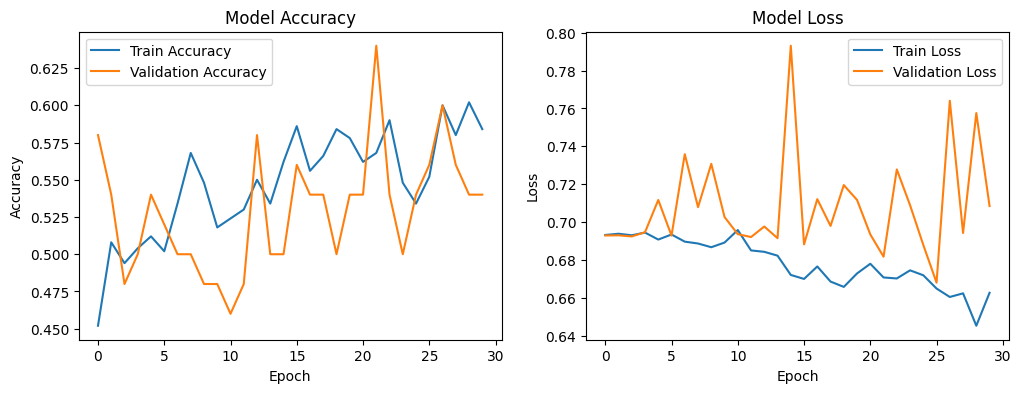

In [59]:
#Train the Model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator
)

# Step 7: Plot Training History
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [61]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.5267 - loss: 0.7047
Test accuracy: 0.5400000214576721
